### TEAM MEMBERS:
Dhruv Patel,
Zahraa Abbasi,
Tahmina Ahmad

# PROJECT GOAL

This dataset includes a large number of red and white wines and their respective specifications. There are two csv files: one for red wines and one for white wins. The specifications include the fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality (0-10). 
For this project, we intend to use k-means to see if there is a correlation between our clusters (using all the variables within the dataset except quality) and quality of the wines. Additionally, we will use PCA to see which variables are most closely related to the quality of the wine.


In [1]:
# import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
plt.style.use('ggplot')


In [2]:
# data import
dfWhiteWine = pd.read_csv("winequality-white.csv", sep = ';')
dfRedWine = pd.read_csv("winequality-red.csv", sep = ';')

dfRedWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
dfRedWine.info()
features = []
for col, value in dfRedWine.items():
    features.append(col)
    
features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

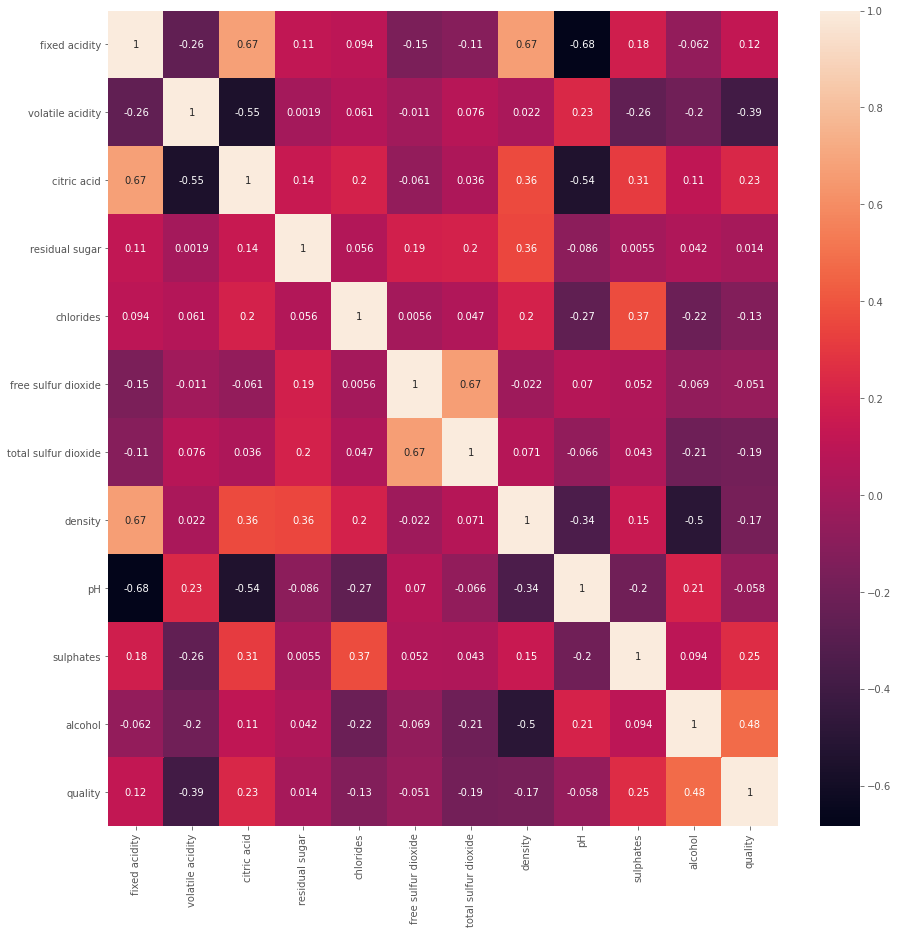

In [4]:
corrMatrix = dfRedWine.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

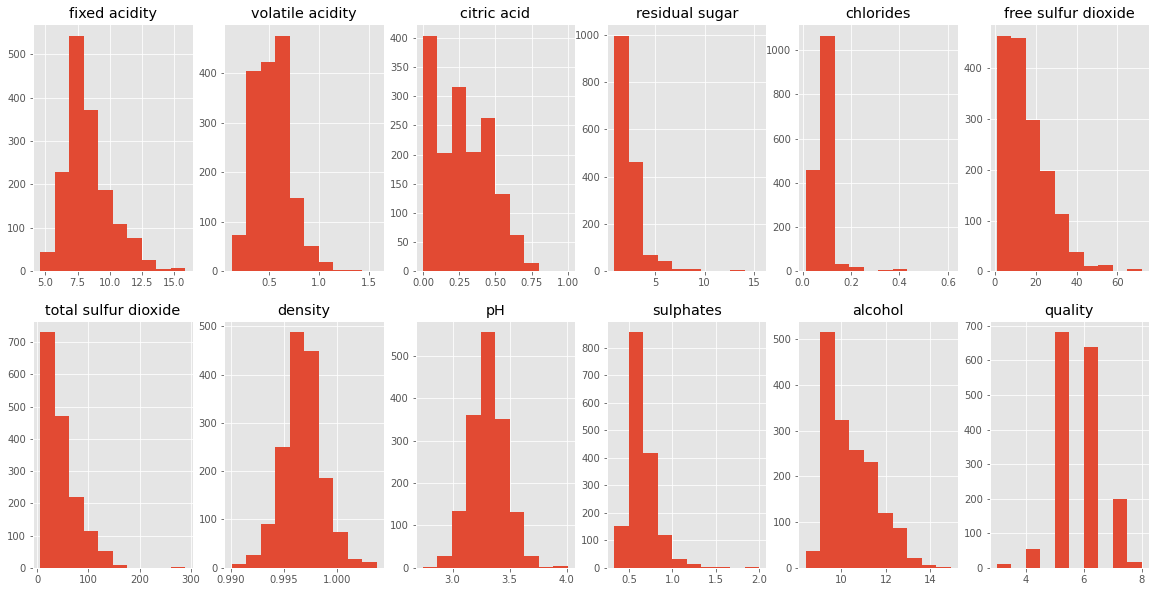

In [5]:
fig,ax = plt.subplots(ncols=6,nrows=2,figsize=(20,10))



featureId = 0
for row in range(2):
    for col in range(6):
        ax[row][col].hist(dfRedWine[features[featureId]])
        ax[row][col].set_title(features[featureId])
        featureId += 1

In [6]:
dfRedWine

# numEach = {}
# for i in range(11):
#     numEach[i] = 0
    
# for index, row in dfRedWine.iterrows():
#     quality = row['quality']
#     numEach[quality] += 1
#     if numEach[quality] > 75:
#         dfRedWine = dfRedWine.drop(index)

# for i in range(11):
#     numEach[i] = 0
# for index, row in dfRedWine.iterrows():
#     quality = row['quality']
#     numEach[quality] += 1

# numEach

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
# data cleaning
#this shows that all data values are not null
dfRedWine[dfRedWine.isnull().any(axis=1)]
dfWhiteWine[dfWhiteWine.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [8]:
# basic analysis
dfRedWineParams = dfRedWine.drop(columns=['quality'])
#dfRedWineParamsArray = df.to_numpy()

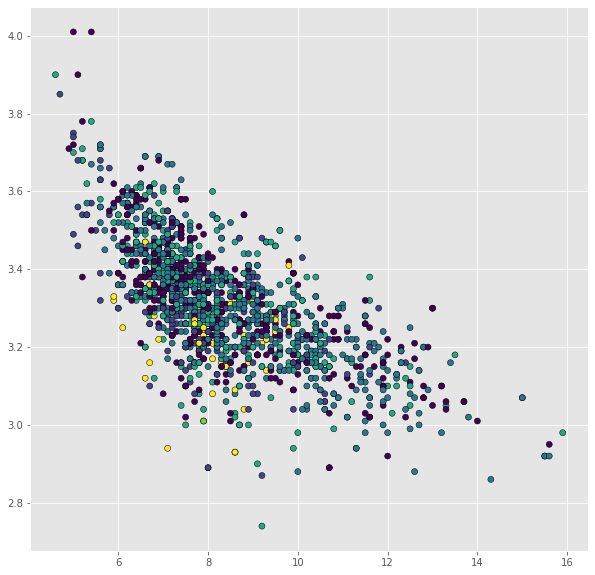

In [9]:
# k means
numClusters = 6
kmeans = KMeans(n_clusters=numClusters).fit(dfRedWineParams)
labels = kmeans.labels_
fig, ax = plt.subplots(1,1, figsize=(10,10))


ax.scatter(dfRedWineParams['fixed acidity'], dfRedWineParams['pH'], c=labels.astype(np.float), edgecolor='k')


In [10]:
# analysis of results
labels = kmeans.labels_

clusterAverage = {}
for i in range(numClusters):
    clusterAverage[i] = []
outliers = []   
for index, value in enumerate(labels):
    quality = dfRedWine['quality'].iloc[index]
    clusterAverage[value].append(quality)
    if value == 4:
        outliers.append([index, value, quality])



In [11]:
for i in clusterAverage:
    print(f'Cluster {i+1} quality average:', np.mean(clusterAverage[i]))


Cluster 1 quality average: 5.700892857142857
Cluster 2 quality average: 5.425531914893617
Cluster 3 quality average: 5.764214046822742
Cluster 4 quality average: 5.541379310344827
Cluster 5 quality average: 7.0
Cluster 6 quality average: 5.068493150684931


From our analysis, we can see that the clusters do a poor job of indicating the quality of the wines. We suspect that this may be because we are taking into account all of the variables. However, it is more probable that only some of the variables (if more than one), are indicative of the wine quality. Thus, we will now perform PCA to determine which variables are correlated to the wine quality. <br>

What is interesting that there is a cluster with only two values. We will be getting back to this when we do our PCA analysis.

In [12]:
pca = PCA(n_components = 2)
newVals = pca.fit_transform(dfRedWineParams)

pca3d = PCA(n_components = 2)
newVals3d = pca.fit_transform(dfRedWineParams)

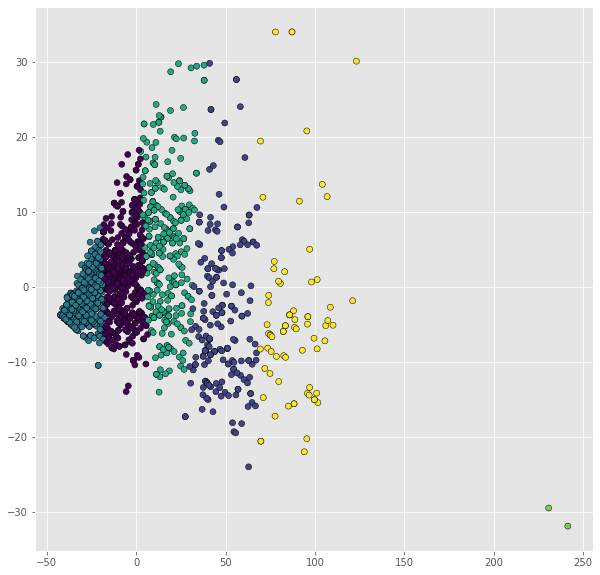

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,10))


ax.scatter(newVals[:,0], newVals[:,1], c=labels.astype(np.float), edgecolor='k')

The PCA graph above shows that the dataset was clustered properly. We will be going through what are the unique properties of each cluster, and how the algorithm chose to group these clusters. <br>

In addition, we are now able to notice the two outliers above. We will be doing further exploratory analysis to deduce what makes them outliers.

In [14]:

print(dfRedWine.shape)
for values in outliers:
    dfRedWine = dfRedWine.drop(values[0])
dfRedWineParams = dfRedWine.drop(columns=['quality'])
dfRedWine.shape


(1599, 12)


(1597, 12)

In [19]:
numClusters = 6
kmeans = KMeans(n_clusters=numClusters).fit(dfRedWineParams)
labels = kmeans.labels_

pca = PCA(n_components = 2)
newVals = pca.fit_transform(dfRedWineParams)
newVals

array([[-12.94553553,  -1.95059829],
       [ 22.37266863,   4.16602625],
       [  7.4360059 ,  -2.60959915],
       ...,
       [ -3.00701223,  14.25980973],
       [  1.57678443,  16.25997839],
       [ -3.55235967,   3.12427457]])

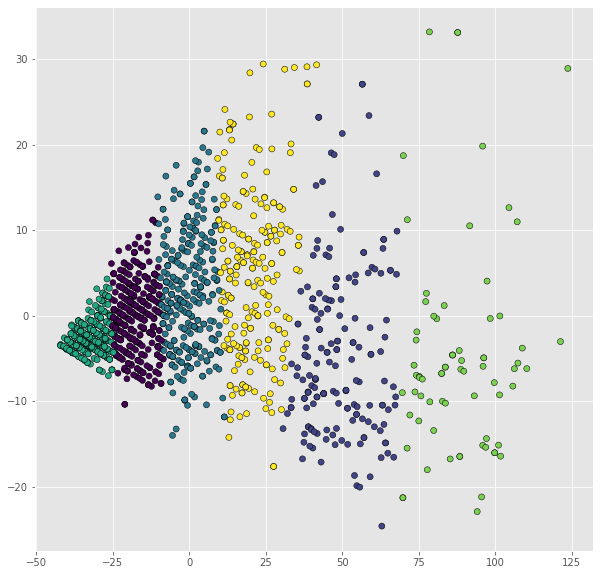

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(newVals[:,0], newVals[:,1], c=labels.astype(np.float), edgecolor='k')

Text(0, 0.5, 'SSE')

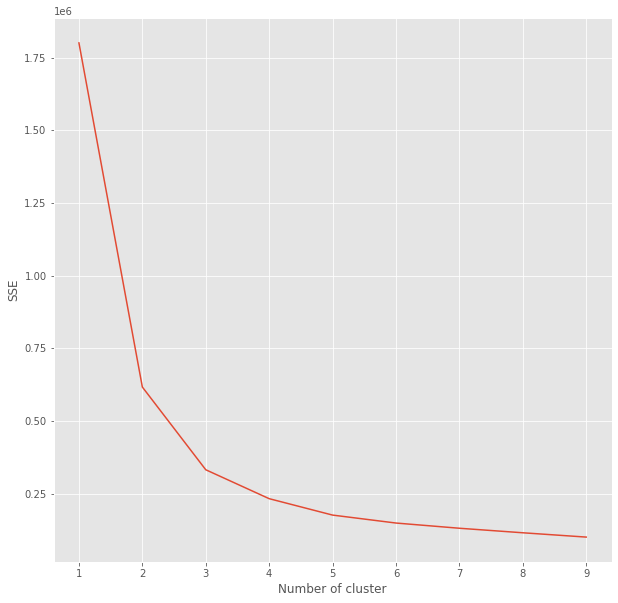

In [27]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dfRedWineParams)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

    
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(list(sse.keys()), list(sse.values()))
ax.set_xlabel("Number of cluster")
ax.set_ylabel("SSE")


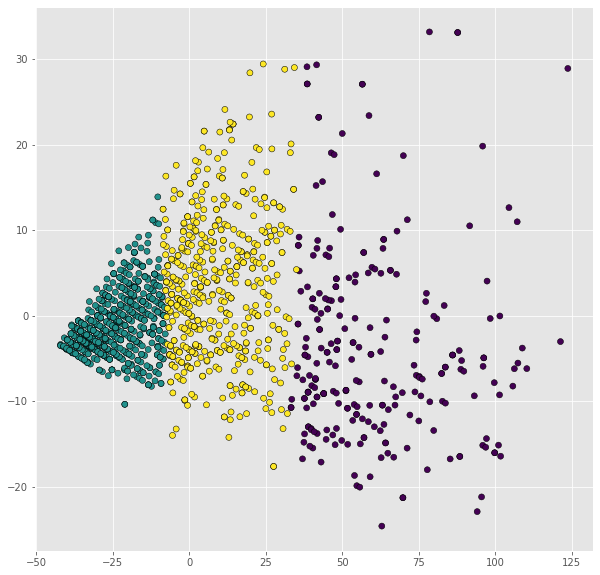

In [30]:
numClusters = 3
kmeans = KMeans(n_clusters=numClusters).fit(dfRedWineParams)
labels = kmeans.labels_

pca = PCA(n_components = 2)
newVals = pca.fit_transform(dfRedWineParams)
newVals

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(newVals[:,0], newVals[:,1], c=labels.astype(np.float), edgecolor='k')

In [32]:
labels = kmeans.labels_

clusterAverage = {}
for i in range(numClusters):
    clusterAverage[i] = []
   
for index, value in enumerate(labels):
    quality = dfRedWine['quality'].iloc[index]
    clusterAverage[value].append(quality)

for i in clusterAverage:
    print(f'Cluster {i+1} quality average:', np.mean(clusterAverage[i]))


Cluster 1 quality average: 5.464285714285714
Cluster 2 quality average: 5.746054519368723
Cluster 3 quality average: 5.1796875
Cluster 4 quality average: 5.691056910569106


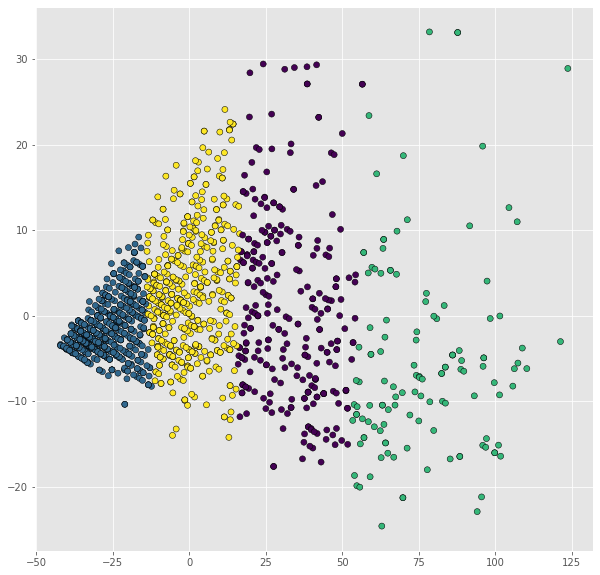

In [31]:
numClusters = 4
kmeans = KMeans(n_clusters=numClusters).fit(dfRedWineParams)
labels = kmeans.labels_

pca = PCA(n_components = 2)
newVals = pca.fit_transform(dfRedWineParams)
newVals

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(newVals[:,0], newVals[:,1], c=labels.astype(np.float), edgecolor='k')

In [33]:
labels = kmeans.labels_

clusterAverage = {}
for i in range(numClusters):
    clusterAverage[i] = []
   
for index, value in enumerate(labels):
    quality = dfRedWine['quality'].iloc[index]
    clusterAverage[value].append(quality)

for i in clusterAverage:
    print(f'Cluster {i+1} quality average:', np.mean(clusterAverage[i]))


Cluster 1 quality average: 5.464285714285714
Cluster 2 quality average: 5.746054519368723
Cluster 3 quality average: 5.1796875
Cluster 4 quality average: 5.691056910569106


Text(0, 0.5, 'SSE')

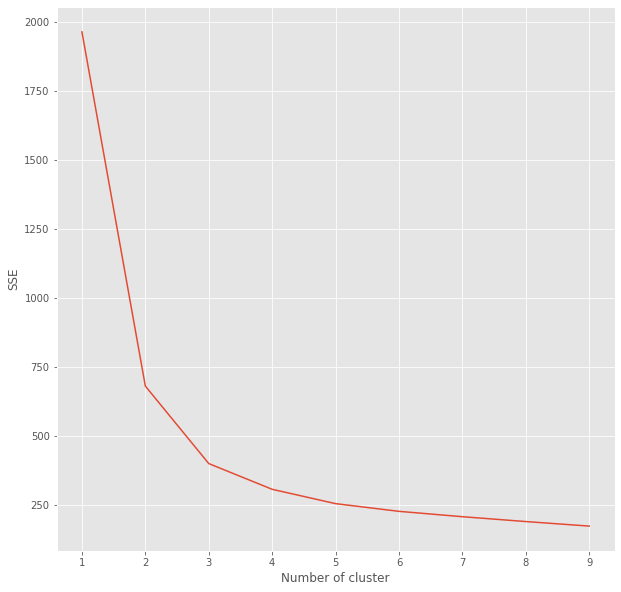

In [44]:
dfShort = dfRedWine[['volatile acidity', 'sulphates', 'alcohol', 'citric acid', 'quality']]
dfShortParams = dfShort.drop(columns=['quality'])

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dfShortParams)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

    
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(list(sse.keys()), list(sse.values()))
ax.set_xlabel("Number of cluster")
ax.set_ylabel("SSE")

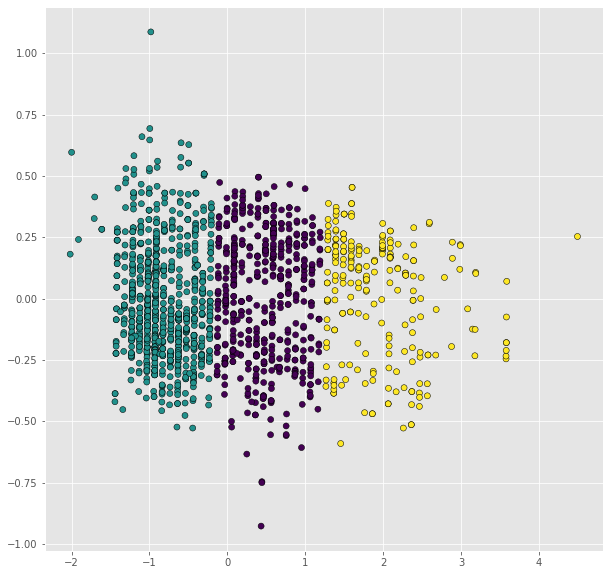

In [45]:
numClusters = 3
kmeans = KMeans(n_clusters=numClusters).fit(dfShortParams)
labels = kmeans.labels_

pca = PCA(n_components = 2)
newVals = pca.fit_transform(dfShortParams)
newVals

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(newVals[:,0], newVals[:,1], c=labels.astype(np.float), edgecolor='k')

In [46]:
labels = kmeans.labels_

clusterAverage = {}
for i in range(numClusters):
    clusterAverage[i] = []
   
for index, value in enumerate(labels):
    quality = dfShort['quality'].iloc[index]
    clusterAverage[value].append(quality)

for i in clusterAverage:
    print(f'Cluster {i+1} quality average:', np.mean(clusterAverage[i]))

Cluster 1 quality average: 5.796934865900383
Cluster 2 quality average: 5.324228028503563
Cluster 3 quality average: 6.390557939914163


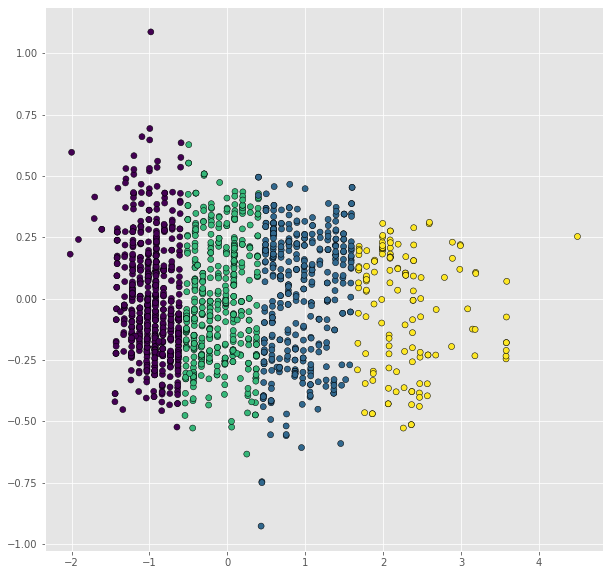

In [47]:
numClusters = 4
kmeans = KMeans(n_clusters=numClusters).fit(dfShortParams)
labels = kmeans.labels_

pca = PCA(n_components = 2)
newVals = pca.fit_transform(dfShortParams)
newVals

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(newVals[:,0], newVals[:,1], c=labels.astype(np.float), edgecolor='k')

In [48]:
labels = kmeans.labels_

clusterAverage = {}
for i in range(numClusters):
    clusterAverage[i] = []
   
for index, value in enumerate(labels):
    quality = dfShort['quality'].iloc[index]
    clusterAverage[value].append(quality)

for i in clusterAverage:
    print(f'Cluster {i+1} quality average:', np.mean(clusterAverage[i]))

Cluster 1 quality average: 5.253968253968254
Cluster 2 quality average: 5.970899470899471
Cluster 3 quality average: 5.637777777777778
Cluster 4 quality average: 6.431654676258993
